In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%load_ext autoreload
%autoreload 2

In [7]:
# compute correlations between different measures
# get a list of csv files
curr_path = Path().absolute()
csv_folder = curr_path.parent / 'figures' / 'poster_amd' / 'group_corr'

# get a list of cif files
path_list = [entry for entry in csv_folder.iterdir() if entry.is_file()]
# extract keys from filenames
key_list = [entry.name.split('_')[-1][:-4] for entry in csv_folder.iterdir() if entry.is_file()]
print(key_list)

['structurematcher', 'PDD', 'AMD', 'Rw-morphed', 'Rw', 'Pcc-morphed', 'Pcc']


In [61]:
# test read data and flatten
key = key_list[1]
file_path = path_list[1]

df = pd.read_csv(file_path).iloc[:, 1:] # drop index column
dm_array = df.to_numpy().flatten()

# load data into a dictionary
data_dict = {}
for i, key in enumerate(key_list):
    file_path = path_list[i]
    dm = pd.read_csv(file_path).iloc[:, 1:] # drop index column
    dm_array = dm.to_numpy().flatten()
    data_dict[key] = dm_array
    
data_dict.keys()

dict_keys(['structurematcher', 'PDD', 'AMD', 'Rw-morphed', 'Rw', 'Pcc-morphed', 'Pcc'])

In [62]:
df_agg = pd.DataFrame.from_dict(data_dict).loc[:, ['Pcc-morphed', 'Rw-morphed', 'PDD', 'AMD']]
df_agg

,Pcc-morphed,Rw-morphed,PDD,AMD
0,6.921130e-13,0.000002,0.000000,0.000000
1,3.847528e-01,0.973207,0.545468,0.470829
2,4.245292e-01,0.988252,0.703411,0.703411
3,4.375023e-01,0.992415,0.637794,0.601790
4,3.829060e-01,0.972123,0.526436,0.455607
...,...,...,...,...
895,4.458147e-01,0.994080,0.727804,0.473524
896,3.349244e-01,0.944886,0.578688,0.396778
897,4.144094e-01,0.985689,0.512314,0.370799
898,4.589230e-01,0.996734,1.494086,1.387449


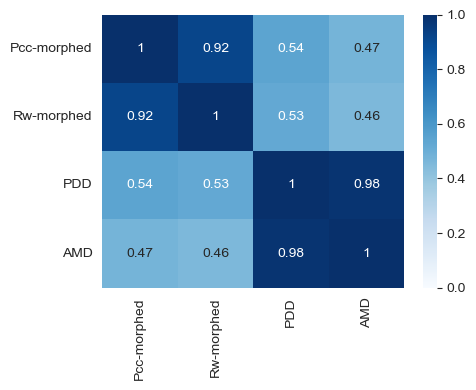

In [60]:
figure_write_folder = curr_path.parent / 'figures' / 'poster_amd'

corr = df_agg.corr()
# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Plot the heatmap with the mask
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues')
plt.grid(False)
# plt.title(f'Correlations between distance measures')
plt.tight_layout()
plt.savefig(figure_write_folder / f'full_corr.png', dpi=300, transparent=True)
plt.show()

In [64]:
df_agg = pd.DataFrame.from_dict(data_dict).loc[:, ['structurematcher' , 'Pcc-morphed', 'Rw-morphed', 'PDD', 'AMD']].dropna(axis=0)
df_agg

,structurematcher,Pcc-morphed,Rw-morphed,PDD,AMD
0,9.923180e-07,6.921130e-13,0.000002,0.000000,0.000000
31,2.895399e-15,6.583623e-13,0.000002,0.000000,0.000000
34,4.511545e-01,1.510108e-01,0.715619,0.219406,0.065658
39,6.420745e-01,1.644384e-01,0.740476,0.212287,0.063813
62,2.511222e-16,1.031786e-12,0.000002,0.000000,0.000000
...,...,...,...,...,...
873,3.943792e-01,4.787935e-01,0.999093,1.030837,0.970204
877,4.378961e-01,4.628887e-01,0.997171,0.994196,0.895603
896,3.400965e-01,3.349244e-01,0.944886,0.578688,0.396778
897,3.623393e-01,4.144094e-01,0.985689,0.512314,0.370799


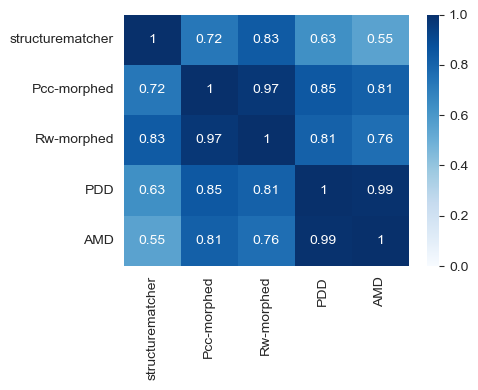

In [65]:
corr = df_agg.corr()
# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Plot the heatmap with the mask
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues')
plt.grid(False)
# plt.title(f'Correlations between distance measures')
plt.tight_layout()
plt.savefig(figure_write_folder / f'corr_sparse_structurematcher.png', dpi=300, transparent=True)
plt.show()